In [216]:
import pandas as pd
from functools import reduce
import seaborn as sns

btcdf = pd.read_csv('BTCUSDT_1d.csv', 
                    index_col=False,
                    header=None,
                    names=["Open Time", 
                           "Open", 
                           "High", 
                           "Low", 
                           "Close", 
                           "Volume (BTC)", 
                           "Close Time", 
                           "Volume (USDT)", 
                           "Trade Count", 
                           "Taker Volume (BTC)", 
                           "Take Volume (USDT)"],
                   )

btcdf = btcdf.drop(['Open', 'High', 'Low', 'Close Time'], axis=1)
btcdf['Open Time'] = pd.to_datetime(btcdf['Open Time'])

btcdf['Prev Close'] = btcdf['Close'].shift(1)
btcdf['Change'] = btcdf['Close'] - btcdf['Prev Close']
btcdf['% Change'] = btcdf['Change']/btcdf['Prev Close']
btcdf = btcdf.reindex(columns=['Open Time',
                       'Close',
                       'Prev Close',
                       'Change',
                               '% Change',
                       'Volume (BTC)', 
                       'Volume (USDT)', 
                       'Trade Count' 
                      ])

# Double check the math is right here

price_change = [(1 + x) for x in btcdf['% Change'].tolist() if str(x) != 'nan']
res = reduce(lambda x, y: x*y, price_change)

res * 4285.08 

/var/folders/db/_0w3_y1d2s33xkqjbgns5d9c0000gn/T/ipykernel_76628/1655579384.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  btcdf = pd.read_csv('BTCUSDT_1d.csv',


27607.56999999984

In [217]:
biggest_btc_red = btcdf.sort_values('% Change')
biggest_btc_red.head(10)

,Open Time,Close,Prev Close,Change,% Change,Volume (BTC),Volume (USDT),Trade Count
938,2020-03-11 20:00:00,4800.00,7934.52,-3134.52,-0.395048,261505.608653,1.628590e+09,1770812
152,2018-01-15 19:00:00,10900.00,13539.93,-2639.93,-0.194974,63401.169175,7.221508e+08,418243
28,2017-09-13 20:00:00,3189.02,3944.69,-755.67,-0.191566,1665.021543,5.914261e+06,9066
1761,2022-06-12 20:00:00,22487.41,26574.53,-4087.12,-0.153798,254611.034966,6.192246e+09,3261484
172,2018-02-04 19:00:00,6939.99,8184.81,-1244.82,-0.152089,63403.182579,4.711662e+08,533510
1371,2021-05-18 20:00:00,36690.09,42849.78,-6159.69,-0.143751,354347.243161,1.347769e+10,6331062
1910,2022-11-08 19:00:00,15922.81,18547.23,-2624.42,-0.141499,731926.929729,1.273772e+10,13605474
127,2017-12-21 19:00:00,13326.61,15492.64,-2166.03,-0.139810,36076.271175,4.775099e+08,243261
135,2017-12-29 19:00:00,12440.01,14378.90,-1938.89,-0.134843,19221.158039,2.478040e+08,190204
679,2019-06-26 20:00:00,11329.99,13093.80,-1763.81,-0.134706,173894.820889,2.058444e+09,1357233


In [218]:
biggest_btc_green = btcdf.sort_values('% Change', ascending=False)
top_ten_candles = biggest_btc_green.head(10)

biggest_btc_red = btcdf.sort_values('% Change', ascending=True)
bottom_ten_candles = biggest_btc_red.head(10)

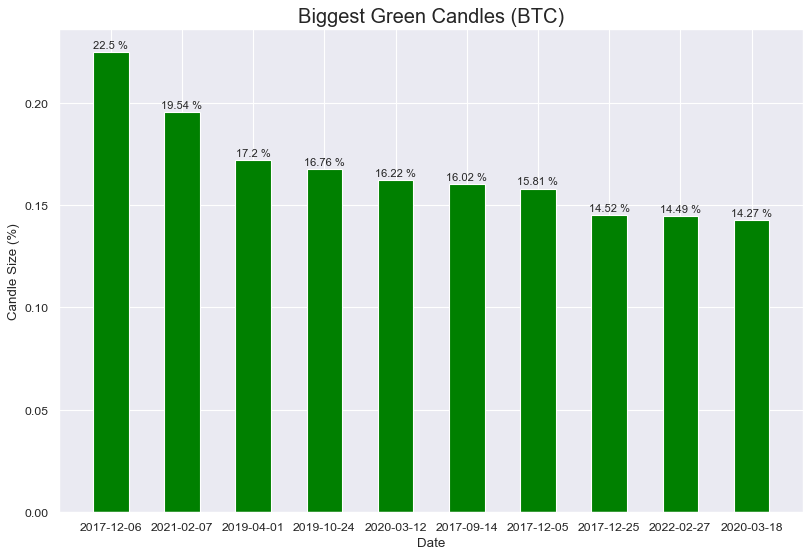

In [219]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

x_labels = [x.strftime("%Y-%m-%d") for x in top_ten_candles['Open Time'].tolist()]
y_labels = top_ten_candles['% Change'].tolist()

figure(figsize=(12, 8), dpi=80)
plt.bar([i for i in range(10)], y_labels, width=0.5, align='center', color = "green")
plt.title('Biggest Green Candles (BTC)', fontdict={'fontsize': 18})
plt.xlabel('Date')
plt.ylabel('Candle Size (%)')
plt.xticks([i for i in range(10)], x_labels)

for i in range(len(x_labels)):
    plt.text(i,y_labels[i] + 0.001, str(round(y_labels[i] * 100, 2)) + " %", ha='center', va='bottom', linespacing=2)

plt.show()

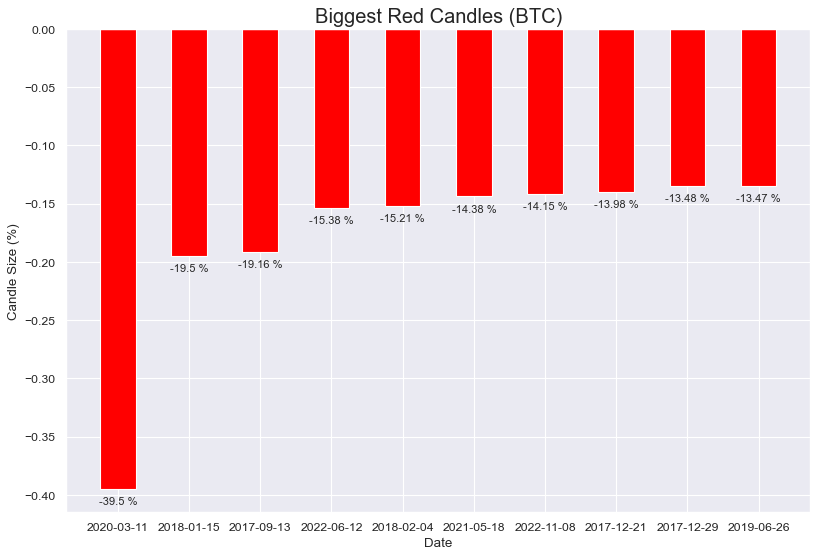

In [220]:
x_labels = [x.strftime("%Y-%m-%d") for x in bottom_ten_candles['Open Time'].tolist()]
y_labels = bottom_ten_candles['% Change'].tolist()

figure(figsize=(12, 8), dpi=80)
plt.bar([i for i in range(10)], y_labels, width=0.5, align='center', color = "red")
plt.title('Biggest Red Candles (BTC)', fontdict={'fontsize': 18})
plt.xlabel('Date')
plt.ylabel('Candle Size (%)')
plt.xticks([i for i in range(10)], x_labels)

for i in range(len(x_labels)):
    plt.text(i,y_labels[i] - 0.015, str(round(y_labels[i] * 100, 2)) + " %", ha='center', va='bottom', linespacing=2)

plt.show()

In [221]:
btcdf_without_top_ten = btcdf.drop(index=top_ten_candles.index.tolist())
price_change = [(1 + x) for x in btcdf_without_top_ten['% Change'].tolist() if str(x) != 'nan']
res = reduce(lambda x, y: x*y, price_change)

res * 4285.08 

5888.694011567212

In [222]:
price_change = [(1 + x) for x in btcdf['% Change'].tolist() if str(x) != 'nan']
res = reduce(lambda x, y: x*y, price_change)

res * 4285.08 

27607.56999999984

In [223]:
top_ten_candles

,Open Time,Close,Prev Close,Change,% Change,Volume (BTC),Volume (USDT),Trade Count
112,2017-12-06 19:00:00,16599.00,13550.05,3048.95,0.225014,7487.065695,1.095553e+08,57541
1271,2021-02-07 19:00:00,46374.87,38795.69,7579.18,0.195361,138597.536914,5.881537e+09,3230961
593,2019-04-01 20:00:00,4857.29,4144.56,712.73,0.171968,105383.639263,4.890187e+08,609133
799,2019-10-24 20:00:00,8655.02,7412.41,1242.61,0.167639,90748.218174,7.373295e+08,775418
939,2020-03-12 20:00:00,5578.60,4800.00,778.60,0.162208,402201.673764,2.063820e+09,2309830
29,2017-09-14 20:00:00,3700.00,3189.02,510.98,0.160231,1968.866492,6.588767e+06,10445
111,2017-12-05 19:00:00,13550.05,11699.99,1850.06,0.158125,6707.946319,8.440953e+07,40196
131,2017-12-25 19:00:00,15689.01,13699.34,1989.67,0.145238,15034.668104,2.248437e+08,133133
1656,2022-02-27 19:00:00,43160.00,37699.07,5460.93,0.144856,73945.638580,2.975160e+09,1931087
945,2020-03-18 20:00:00,6162.37,5393.04,769.33,0.142652,199020.873439,1.164740e+09,1403608


In [224]:
top_ten_candles.index.tolist()[:1]

[112]

In [225]:
price_change = [(1 + x) for x in btcdf['% Change'].tolist() if str(x) != 'nan']
res = reduce(lambda x, y: x*y, price_change)
returns_without_top_i = [res]
returns_without_bottom_i = [res]

for i in range(1,10):
    missed = top_ten_candles.index.tolist()[:i]
    btcdf_without_top_u = btcdf.drop(index=missed)
    price_change = [(1 + x) for x in btcdf_without_top_u['% Change'].tolist() if str(x) != 'nan']
    res = reduce(lambda x, y: x*y, price_change)
    returns_without_top_i.append(res)

returns_without_top_i = [i * 100 for i in returns_without_top_i]

for i in range(1,10):
    missed = bottom_ten_candles.index.tolist()[:i]
    btcdf_without_bot_u = btcdf.drop(index=missed)
    price_change = [(1 + x) for x in btcdf_without_bot_u['% Change'].tolist() if str(x) != 'nan']
    res = reduce(lambda x, y: x*y, price_change)
    returns_without_bottom_i.append(res)

returns_without_bottom_i = [i * 100 for i in returns_without_bottom_i]

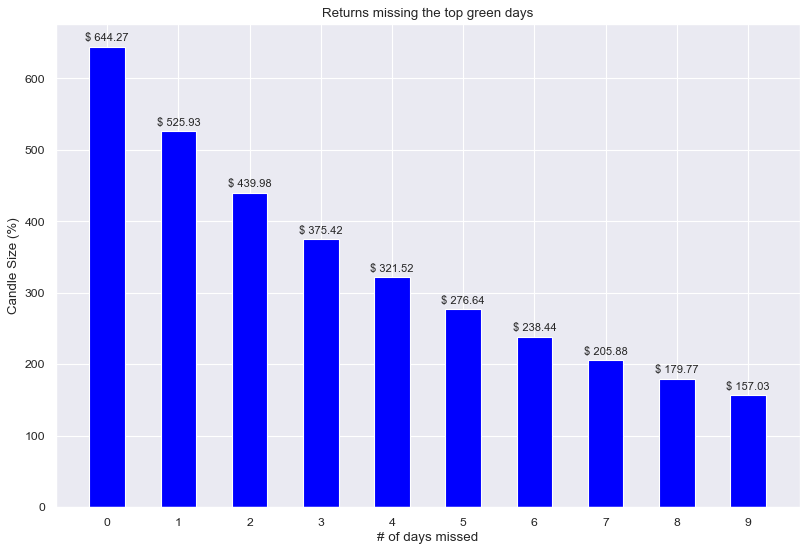

In [226]:
import numpy as np

x_labels = [x for x in range(10)]
y_labels = returns_without_top_i

figure(figsize=(12, 8), dpi=80)
plt.bar([i for i in range(10)], y_labels, width=0.5, align='center', color = "blue")
plt.title('Returns missing the top green days')
# plt.xticks([])
plt.xlabel('# of days missed')
plt.ylabel('Candle Size (%)')
plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1.0))

for i in range(len(x_labels)):
    plt.text(i,y_labels[i] + 5, "$ " + str(round(y_labels[i], 2)), ha='center', va='bottom', linespacing=2)
    

plt.show()

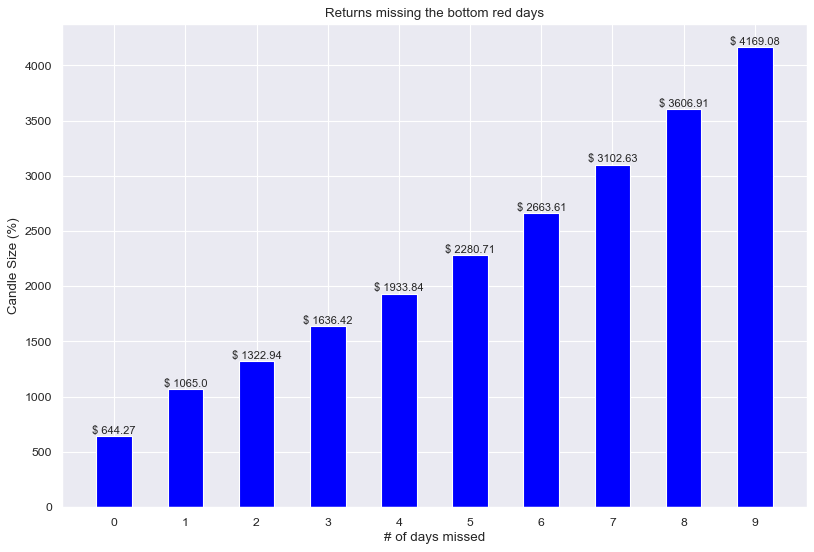

In [227]:
x_labels = [x for x in range(10)]
y_labels = returns_without_bottom_i

figure(figsize=(12, 8), dpi=80)
plt.bar([i for i in range(10)], y_labels, width=0.5, align='center', color = "blue")
plt.title('Returns missing the bottom red days')
plt.xlabel('# of days missed')
plt.ylabel('Candle Size (%)')
plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1.0))

for i in range(len(x_labels)):
    plt.text(i,y_labels[i] + 5, "$ " + str(round(y_labels[i], 2)), ha='center', va='bottom', linespacing=2)
    

plt.show()

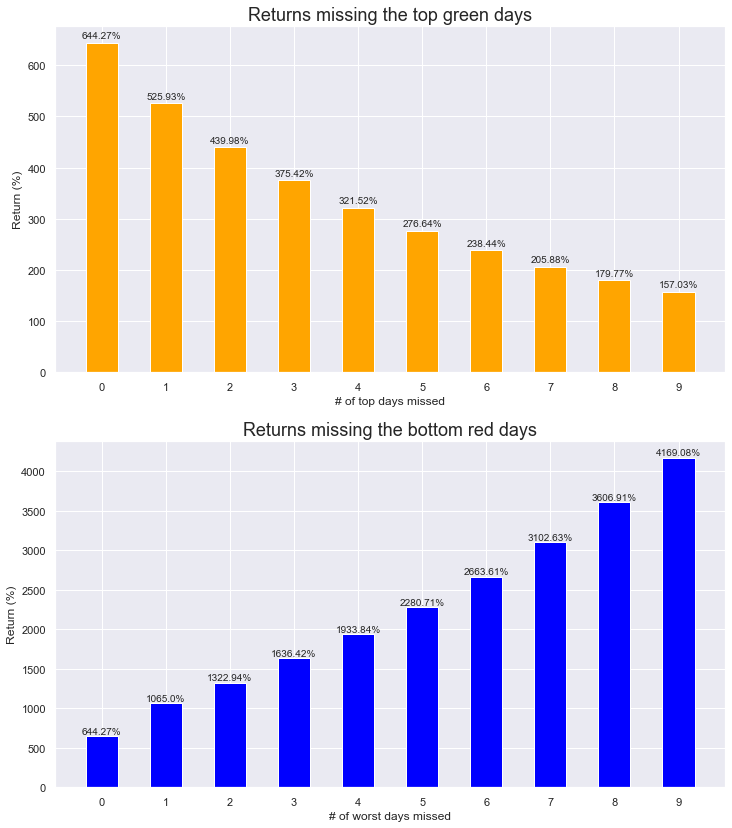

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

In [228]:
without_top_x_labels = [x for x in range(10)]
without_top_y_labels = returns_without_top_i

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

figure(figsize=(12, 8), dpi=80)
axes[0].bar(without_top_x_labels, without_top_y_labels, width=0.5, align='center', color = "orange")
axes[0].set_title('Returns missing the top green days', fontdict={'fontsize': 18})
axes[0].set_xlabel('# of top days missed')
axes[0].set_ylabel('Return (%)')
axes[0].set_xticks(np.arange(min(without_top_x_labels), max(without_top_x_labels)+1, 1.0))

for i in range(len(without_top_x_labels)):
    axes[0].text(i,without_top_y_labels[i] + 5, 
             str(round(without_top_y_labels[i], 2)) + "%", ha='center', va='bottom', linespacing=2)

x_labels = [x for x in range(10)]
y_labels = returns_without_bottom_i

figure(figsize=(12, 8), dpi=80)

axes[1].bar([i for i in range(10)], y_labels, width=0.5, align='center', color = "blue")
axes[1].set_title('Returns missing the bottom red days', fontdict={'fontsize': 18})
axes[1].set_xlabel('# of worst days missed')
axes[1].set_ylabel('Return (%)')
axes[1].set_xticks(np.arange(min(x_labels), max(x_labels)+1, 1.0))

for i in range(len(x_labels)):
    axes[1].text(i,y_labels[i] + 5, str(round(y_labels[i], 2)) + "%", ha='center', va='bottom', linespacing=2)

plt.show()

In [229]:
# let's check to see what happen if we miss the top bottom + green day

price_change = [(1 + x) for x in btcdf['% Change'].tolist() if str(x) != 'nan']
res = reduce(lambda x, y: x*y, price_change)
returns_without_top_bottom_i = [res]

for i in range(1,10):
    missed = bottom_ten_candles.index.tolist()[:i] + top_ten_candles.index.tolist()[:i]
    btcdf_without_top_bot_u = btcdf.drop(index=missed)
    price_change = [(1 + x) for x in btcdf_without_top_bot_u['% Change'].tolist() if str(x) != 'nan']
    res = reduce(lambda x, y: x*y, price_change)
    returns_without_top_bottom_i.append(res)

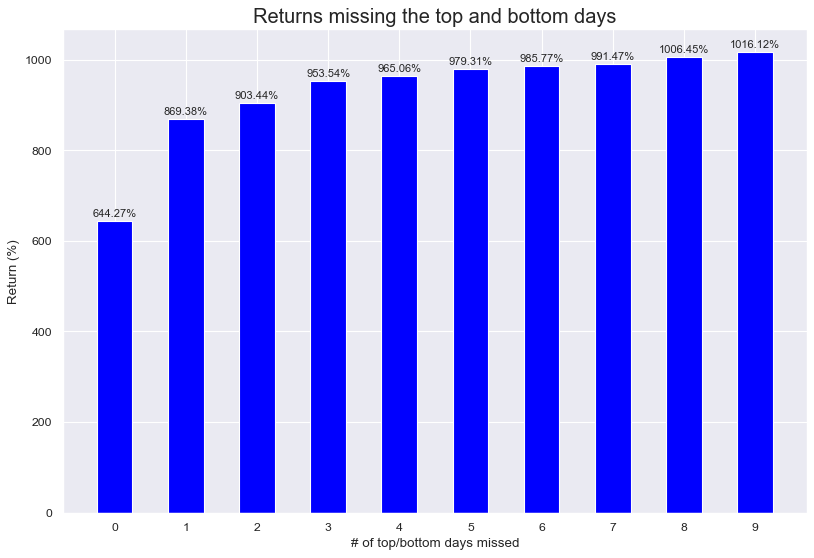

In [230]:
x_labels = [x for x in range(10)]
y_labels = [x * 100 for x in returns_without_top_bottom_i]

figure(figsize=(12, 8), dpi=80)
plt.bar([i for i in range(10)], y_labels, width=0.5, align='center', color = "blue")
plt.title('Returns missing the top and bottom days', fontdict={'fontsize': 18})
plt.xlabel('# of top/bottom days missed')
plt.ylabel('Return (%)')
plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1.0))

for i in range(len(x_labels)):
    plt.text(i,y_labels[i] + 5, str(round(y_labels[i], 2)) + "%", ha='center', va='bottom', linespacing=2)
    
plt.show()

In [231]:
price_change = [x for x in btcdf['% Change'].tolist() if str(x) != 'nan']
sorted_by_bottom_days = [x for x in sorted(price_change) if x < 0]
sorted_by_top_days = [x for x in sorted(price_change, reverse=True) if x >= 0]

In [232]:
# start with $1000 and you DCA a equal amount everyday
daily_amount_dca = 1000 / len(price_change)

closing_prices = btcdf['Close'].tolist()
btc_buys = [daily_amount_dca / p for p in closing_prices]
total_btc = reduce(lambda x, y: x+y, btc_buys)
total_btc # this is how much you'd have in dollar terms

0.09684217988308845

In [233]:
# what if we only buy on red days?
change_d_over_d = btcdf['% Change'].tolist()
closing_prices = btcdf['Close'].tolist()

dca_amt = 1000 / sum(1 for i in change_d_over_d if i < 0) # 991 red days / 2042 total
red_day_buys = [dca_amt / p[1] if p[0] < 0 else 0 for p in zip(change_d_over_d, closing_prices)] #0.0002354872570921862
total_btc = reduce(lambda x, y: x+y, red_day_buys)
total_btc * 28000

2683.6051482950206

In [234]:
# what if we only buy on green days?
change_d_over_d = btcdf['% Change'].tolist()
closing_prices = btcdf['Close'].tolist()

dca_amt = 1000 / sum(1 for i in change_d_over_d if i < 0) # 991 red days / 2042 total
green_day_buys = [dca_amt / p[1] if p[0] >= 0 else 0 for p in zip(change_d_over_d, closing_prices)] #0.0002354872570921862
total_btc = reduce(lambda x, y: x+y, green_day_buys)
total_btc * 28000

2894.399488989486

In [235]:
# what if we only bought on the bottom percentile red days?
green_days = list(filter(lambda x: x > 0, [x for x in btcdf['% Change'].tolist() if str(x) != 'nan']))
red_days = list(filter(lambda x: x < 0, [x for x in btcdf['% Change'].tolist() if str(x) != 'nan']))
green_np_array = np.array(green_days)
red_np_array = np.array(red_days)

red_days_series = pd.Series(red_np_array)
red_days_series.describe()

count    991.000000
mean      -0.026299
std        0.030102
min       -0.395048
25%       -0.034858
50%       -0.016197
75%       -0.006701
max       -0.000005
dtype: float64

In [236]:
green_days_series = pd.Series(green_np_array)
green_days_series.describe()

count    1050.000000
mean        0.028212
std         0.029750
min         0.000014
25%         0.007984
50%         0.017970
75%         0.037947
max         0.225014
dtype: float64

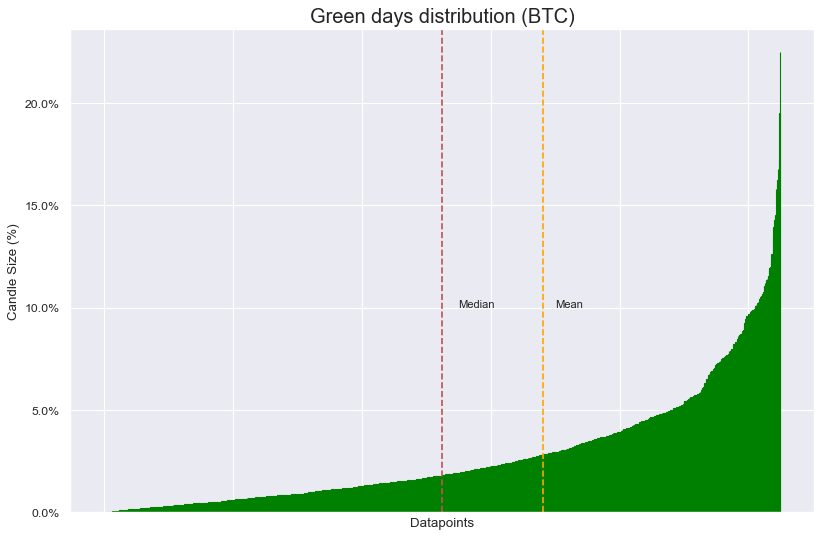

In [278]:
from matplotlib import cm
# plt.pcolor(Z, cmap = cm.viridis)
plt.rcParams['image.cmap'] = 'jet'

green_list = [100.00 * i for i in green_days_series.tolist()]
red_list = [100.00 * i for i in red_days_series.tolist()]

green_list.sort()
red_list.sort()

green_index = green_days_series.index.tolist()
red_index = red_days_series.index.tolist()

result = [(x, y) for x, y in zip(green_list, green_index)]

# df = pd.DataFrame(result, columns=['change', 'index'])


figure(figsize=(12, 8), dpi=80)

plt.title('Green days distribution (BTC)', fontdict={'fontsize': 18})
plt.xlabel('Datapoints')
plt.ylabel('Candle Size (%)')

# sns.barplot(data=df, x="index", y='change', color='green')

plt.bar(green_index, green_list, color = 'red', edgecolor = 'green')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

mean = green_days_series.mean() * 100.00
median = green_days_series.median() * 100.00

mean_x_index = bisect(sorted(green_days_series.tolist()), green_days_series.mean())

plt.axvline(x=mean_x_index, color='orange', linestyle='--')
plt.text(700, 10, 'Mean')
plt.axvline(x=len(green_days)/2, color='r', linestyle='--')
plt.text(550, 10, 'Median')

plt.show()

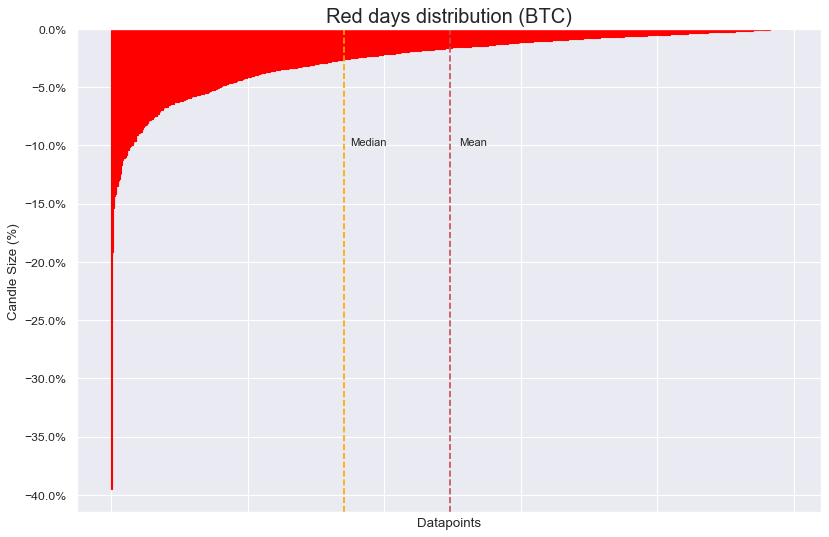

In [288]:
from matplotlib import cm
# plt.pcolor(Z, cmap = cm.viridis)
plt.rcParams['image.cmap'] = 'jet'

green_list = [100.00 * i for i in green_days_series.tolist()]
red_list = [100.00 * i for i in red_days_series.tolist()]

green_list.sort()
red_list.sort()

green_index = green_days_series.index.tolist()
red_index = red_days_series.index.tolist()

result = [(x, y) for x, y in zip(green_list, green_index)]

# df = pd.DataFrame(result, columns=['change', 'index'])


figure(figsize=(12, 8), dpi=80)

plt.title('Red days distribution (BTC)', fontdict={'fontsize': 18})
plt.xlabel('Datapoints')
plt.ylabel('Candle Size (%)')

# sns.barplot(data=df, x="index", y='change', color='green')

plt.bar(red_index, red_list, color = 'red', edgecolor = 'red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

mean = red_days_series.mean() * 100.00
median = red_days_series.median() * 100.00

mean_x_index = bisect(sorted(red_days_series.tolist()), red_days_series.mean())

plt.axvline(x=mean_x_index, color='orange', linestyle='--')
plt.text(510, -10, 'Mean')
plt.axvline(x=len(red_days)/2, color='r', linestyle='--')
plt.text(350, -10, 'Median')

plt.show()

In [22]:
# let's say we only buy on days where we have a 50% decline or more

p50_red_days = np.percentile(red_np_array, 50)
change_d_over_d = btcdf['% Change'].tolist()
closing_prices = btcdf['Close'].tolist()

dca_amt = 1000 / sum(1 for i in change_d_over_d if i < p50_red_days) # 495 red days < p50 / 991 red days / 2042 total
p50_red_day_buys = [dca_amt / p[1] if p[0] < p50_red_days else 0 for p in zip(change_d_over_d, closing_prices)]
total_btc = reduce(lambda x, y: x+y, red_day_buys)
total_btc * 28000

2683.6051482950206

In [23]:
p1 = np.percentile(red_np_array, 1)
p50 = np.percentile(red_np_array, 50)
p99 = np.percentile(red_np_array, 99)

print('p1: {}, p50: {}, p99: {}'.format(p1, p50, p99))

p1: -0.1329995388894086, p50: -0.016197332307472938, p99: -0.00019916180479488514


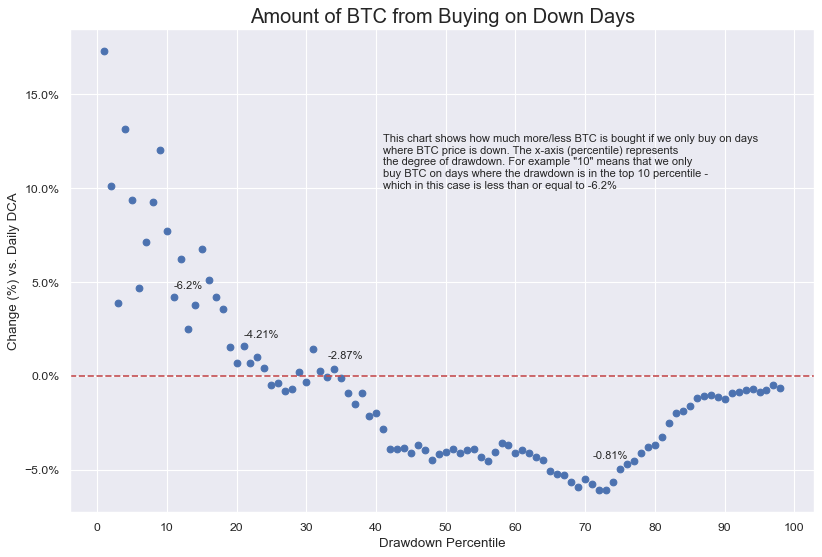

In [174]:
# let's generalize and see if there's any pattern

res = []
change_d_over_d = btcdf['% Change'].tolist()
closing_prices = btcdf['Close'].tolist()

for i in range(1, 99):   
    percentile_i_red_days = np.percentile(red_np_array, i)

    day_count = sum(1 for i in change_d_over_d if i < percentile_i_red_days)
    dca_amt = 1000 / day_count
    red_day_buys = [dca_amt / p[1] if p[0] < percentile_i_red_days else 0 
                    for p in zip(change_d_over_d, closing_prices)]
    total_btc = reduce(lambda x, y: x+y, red_day_buys)
    res.append((i, total_btc, day_count))

percentiles = [x[0] for x in res]
btc = [x[1] for x in res]

x_labels = percentiles

btc_reg_dca = 0.09684217988308845
y_labels = [100.00 * (i - btc_reg_dca)/btc_reg_dca for i in btc]


figure(figsize=(12, 8), dpi=80)
plt.scatter(x_labels, y_labels) #, width=0.5, align='center', color = "blue")
plt.title('Amount of BTC from Buying on Down Days', fontdict={'fontsize': 18})
plt.xticks(np.arange(min(x_labels) - 1, max(x_labels)+11, 10))
plt.text(x_labels[10], y_labels[10] + 0.5, 
             str(round(100 * np.percentile(red_np_array, 10), 2)) + '%')
plt.text(x_labels[20], y_labels[20] + 0.5, 
             str(round(100 * np.percentile(red_np_array, 20), 2)) + '%')
plt.text(x_labels[32], y_labels[32] + 1, str(round(100 * np.percentile(red_np_array, 32), 2)) + '%')
# plt.text(x_labels[50], y_labels[50] - 0.003, str(round(100 * np.percentile(red_np_array, 50), 2)) + '%')
# plt.text(x_labels[90], y_labels[90] - 0.0015, str(round(100 * np.percentile(red_np_array, 90), 2)) + '%')
plt.text(x_labels[70], y_labels[70] + 1.35, str(round(100 * np.percentile(red_np_array, 70), 2)) + '%')
# plt.text(x_labels[71] - 2, y_labels[90] - 0.008, 'Minimum BTC {}'.format(round(y_labels[71], 3)))
plt.text(x_labels[40], 10, 
         'This chart shows how much more/less BTC is bought if we only buy on days \n' + 
         'where BTC price is down. The x-axis (percentile) represents \n' +
         'the degree of drawdown. For example "10" means that we only \n' +
         'buy BTC on days where the drawdown is in the top 10 percentile - \n' +
         'which in this case is less than or equal to -6.2%')


plt.xlabel('Drawdown Percentile')
plt.ylabel('Change (%) vs. Daily DCA')

# btc_reg_dca = 0.09684217988308845
plt.axhline(y=0, color='r', linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())


plt.show()

In [25]:
min_btc = min(btc)
btc.index(min_btc)

71

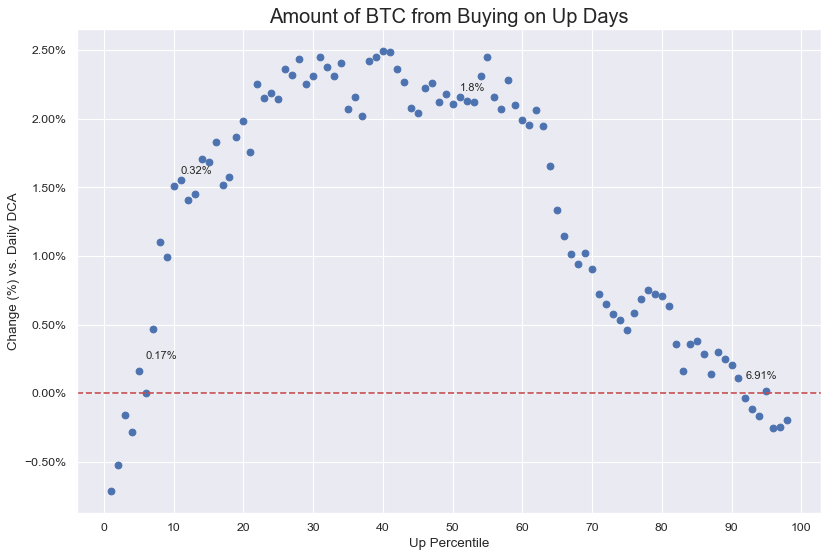

In [185]:
# let's generalize and see if there's any pattern - green days bersion
%matplotlib inline

res = []
change_d_over_d = btcdf['% Change'].tolist()
closing_prices = btcdf['Close'].tolist()

for i in range(1, 99):   
    percentile_i_green_days = np.percentile(green_np_array, i)

    day_count = sum(1 for i in change_d_over_d if i < percentile_i_green_days)
    dca_amt = 1000 / day_count
    green_day_buys = [dca_amt / p[1] if p[0] < percentile_i_green_days else 0 
                    for p in zip(change_d_over_d, closing_prices)]
    total_btc = reduce(lambda x, y: x+y, green_day_buys)
    res.append((i, total_btc, day_count))

percentiles = [x[0] for x in res]
btc = [x[1] for x in res]

x_labels = percentiles
btc_reg_dca = 0.09684217988308845
y_labels = [100.00 * (i - btc_reg_dca)/btc_reg_dca for i in btc]


figure(figsize=(12, 8), dpi=80)
plt.scatter(x_labels, y_labels) #, width=0.5, align='center', color = "blue")
plt.title('Amount of BTC from Buying on Up Days', fontdict={'fontsize': 18})

plt.xticks(np.arange(min(x_labels) - 1, max(x_labels)+11, 10))
plt.text(x_labels[5], y_labels[5] + 0.25, str(round(100 * np.percentile(green_np_array, 5), 2)) + '%')
plt.text(x_labels[10], y_labels[10] + 0.05, str(round(100 * np.percentile(green_np_array, 10), 2)) + '%')
plt.text(x_labels[50], y_labels[50] + 0.05, str(round(100 * np.percentile(green_np_array, 50), 2)) + '%')
plt.text(x_labels[90] + 1, y_labels[90] - 0.0014, str(round(100 * np.percentile(green_np_array, 90), 2)) + '%')

plt.xlabel('Up Percentile')
plt.ylabel('Change (%) vs. Daily DCA')


plt.axhline(y=0, color='r', linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [27]:
len(btcdf)

2042

In [28]:
len(closing_prices)

2042

In [29]:
test = [i for i in range(10)]
test[1::2]

[1, 3, 5, 7, 9]

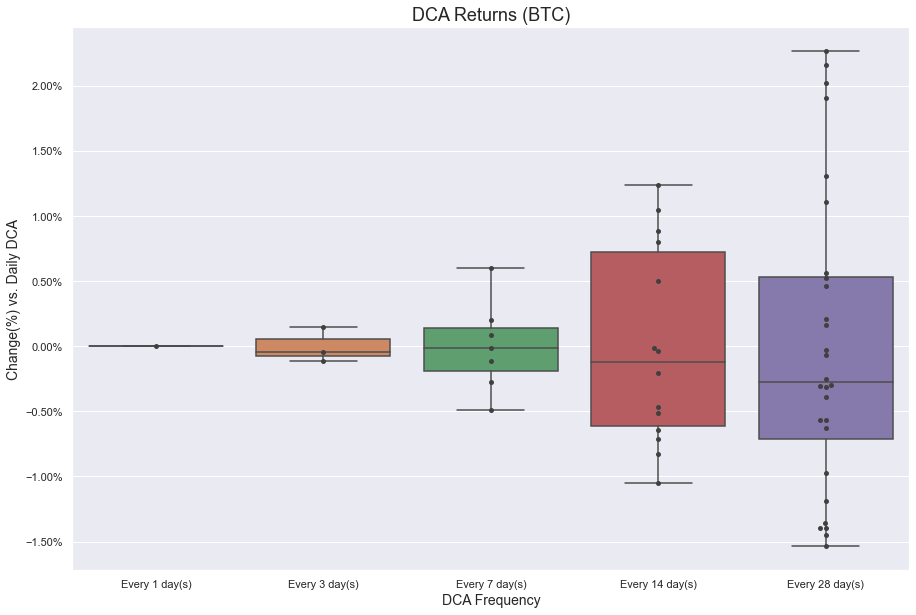

In [142]:
from matplotlib import cm
import matplotlib.ticker as mtick

DCA_freq = [1, 3, 7, 14, 28]
#closing_prices
'''
If the dca freq is 3 days, then we need to try it starting from day 1, 2, 3. 
Then take the average result across these 3 to see how good it actually is
'''
result = []

for freq in DCA_freq:
    for i in range(freq):
        starting_point = i
        buys = closing_prices[i::freq]
        dca_amt = 100.00 / len(buys)
        amts = [dca_amt / p for p in buys]
        total_btc = reduce(lambda x,y: x+y, amts)
        result.append((freq, i, total_btc))

        
        
# color_mapping = {1: 'blue', 3: 'orange', 7: 'purple', 14: 'brown', 28: 'yellow'}
res_mapping = {}
vectors = []
for r in result:
    if r[0] not in res_mapping:
        res_mapping[r[0]] = []
    res_mapping[r[0]].append(r[2])
    
for k,v in res_mapping.items():
    vectors.append(v)
    
DCA_daily = res_mapping[1][0]
# vectors_normalized = [(v - DCA_daily)/DCA_daily for v in vectors]

result = [('Every {} day(s)'.format(r[0]), r[1], (r[2] - DCA_daily)/DCA_daily * 100.00) for r in result]
dca_df = pd.DataFrame(result, columns=['DCA Frequency', 'Trial', 'BTC'])
plt.figure(figsize=(15,10))

ax = plt.gca()
y_fmt = '%.0f%%'
# ax.yaxis.set_major_formatter(mtick.FuncFormatter(y_fmt))

plt.title('DCA Returns (BTC)',fontdict={'fontsize': 18})

sns.boxplot(data=dca_df, x="DCA Frequency", y="BTC")
sns.swarmplot(data=dca_df, x="DCA Frequency", y="BTC", color=".25")

# y_fmt = '%.0f%%'
# ax.yaxis.set_major_formatter(mtick.FuncFormatter(y_fmt))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.ylabel('Change(%) vs. Daily DCA',fontdict={'fontsize': 14})
plt.xlabel('DCA Frequency',fontdict={'fontsize': 14})

plt.show()

In [144]:
btcdf.head()

,Open Time,Close,Prev Close,Change,% Change,Volume (BTC),Volume (USDT),Trade Count
0,2017-08-16 20:00:00,4285.08,NaN,NaN,NaN,795.150377,3.454770e+06,3427
1,2017-08-17 20:00:00,4108.37,4285.08,-176.71,-0.041238,1199.888264,5.086958e+06,5233
2,2017-08-18 20:00:00,4139.98,4108.37,31.61,0.007694,381.309763,1.549484e+06,2153
3,2017-08-19 20:00:00,4086.29,4139.98,-53.69,-0.012969,467.083022,1.930364e+06,2321
4,2017-08-20 20:00:00,4016.00,4086.29,-70.29,-0.017201,691.743060,2.797232e+06,3972
